# Linear Regression Exercise

Congratulations! You have just signed a contract with a New York City-based e-commerce company that sells clothing online.
    

The way this company works is that it holds face-to-face consultation meetings to advise customers and after the meeting, the customer registers her order through the application or website.

The company is trying to decide whether to invest more in the mobile app or the website. They've hired you on a contract to help them figure it out!
    
Lets start!

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

##### This dataset includes these informatons:

Email

Address

Avatar : the color of profile

Avg. Session Length : Average length of counseling sessions

Time on App : The average time spent in the application after the session

Time on Website : The average time spent in the website after the session

Length of Membership : Number of years of customer subscription

Yearly Amount Spent :  Average purchase amount in one year        

In [3]:
data = pd.read_csv(r"D:\Artificial Intelligence & Robotic\Data Science & Machine Learning - AIR Center\Exercises\Datasets for exercising\Practices Datasets\Practice 6\Ecommerce Customers.csv")

A brief look at the data :

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Checking the data in general:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Check the statistical information of the data in general :

In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis (EDA)

Drawing a jointplot for the average annual purchase by time spent on the website

for this drawing use palette='GnBu_d' and Style='whitegrid

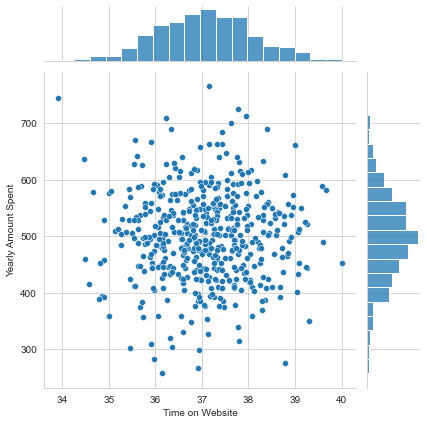

In [8]:
sns.set_style("whitegrid")
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=data, palette="GnBu_d")

Do the same plot for the average time spent in the application.

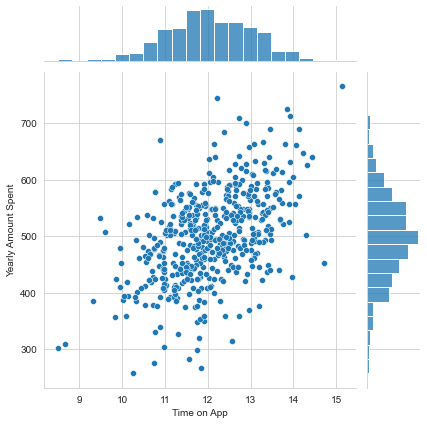

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=data, palette='GnBu_d')

What's your resylt ?!

result : " Time on App " is more efficiet than " Time on Website " on " Yearly Amount Spent ".


Draw a hexplot with a histograms for " Length of Memebership " according to " Time on Website ".

In [10]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

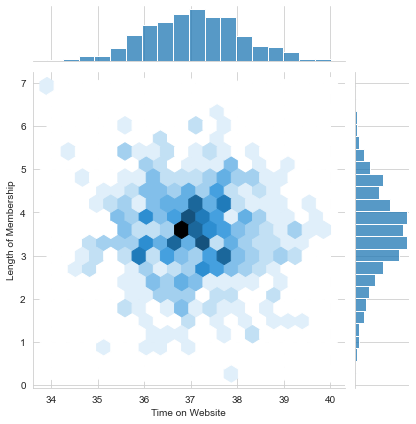

In [11]:
sns.jointplot(x='Time on Website', y='Length of Membership', data=data, kind='hex')

Do the same plot for " Time on App ".

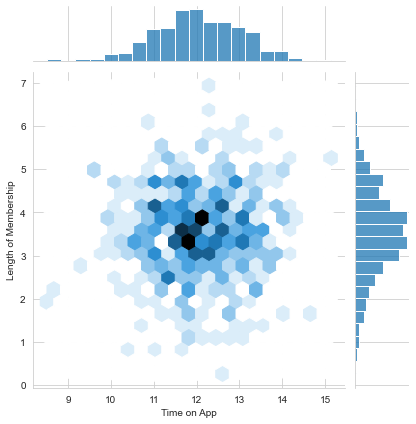

In [12]:
sns.jointplot(x='Time on App', y='Length of Membership', data=data, kind='hex')

What's the result ?!

result : " Time on App " is more efficient than " Time on Website " on " Length of Membership ".

A pairplot on data.

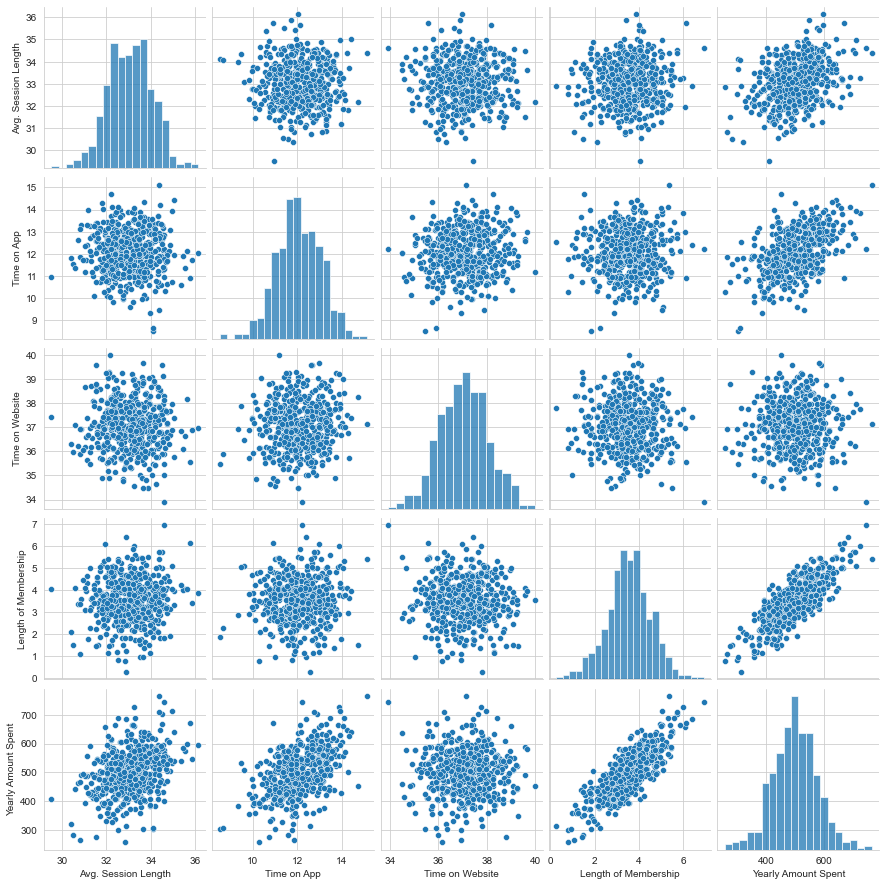

In [13]:
sns.pairplot(data)

According to the plots above which feature is most efficient on " Yearly Amount Spent " ?!

Answer : Length of Membership

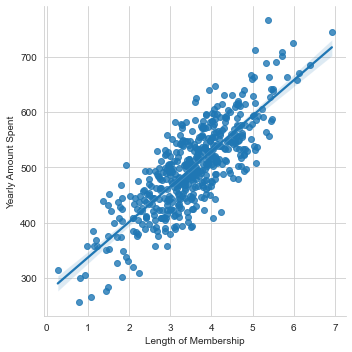

In [14]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=data, palette='Set1')

# Training and Testing Data

Divide the data to features and labels :)

In [15]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
x = data.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar'], axis=1)
y = data["Yearly Amount Spent"]

Create train and test data. 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=101)

# Training the Model

### Linear Regression model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

Fitting model on train data.

In [20]:
lm.fit(x_train, y_train)

LinearRegression()

# Predicting Test Data

Predict Final purchase amount using your model

In [21]:
prediction = lm.predict(x_test)

# Evaluating the Model

Draw a scatter plot for actual purchase amounts and predicted amounts. We know that if these values are close to each other, that means x=y and we will see a 45 degree line.

<AxesSubplot:xlabel='Yearly Amount Spent'>

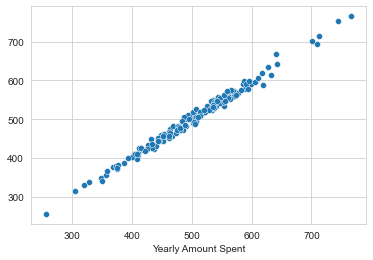

In [22]:
sns.scatterplot(x=y_test, y=prediction)

Mean Absolute Error, Mean Squared Erro and the Root Mean Squared Error

In [23]:
print(data['Yearly Amount Spent'].mean())
print(prediction.mean())

499.314038258591
501.41828733938473


In [24]:
my_error = abs(data['Yearly Amount Spent'].mean() - prediction.mean()) * 100 / data['Yearly Amount Spent'].mean()
print(my_error)

0.42142798310508844


for this amount of 500$ the MAE is less than 10% that means it's a very good predication for our model.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

print('MSE :', mean_squared_error(prediction, y_test))
print('MAE :', mean_absolute_error(prediction, y_test))
print('RMSE :', sqrt( mean_squared_error(prediction, y_test) ))

MSE : 79.81305165097437
MAE : 7.228148653430826
RMSE : 8.93381506697863


# Residuals

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

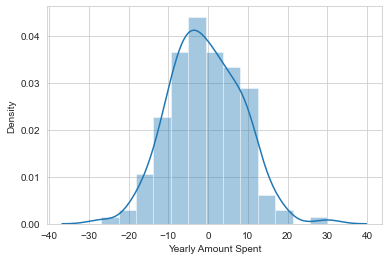

In [24]:
sns.distplot((y_test-prediction), bins=13)

According to this plot we don't have Statistical problems.

# Conclusion

In [25]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [26]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [27]:
coeffecients = pd.DataFrame(lm.coef_, x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<AxesSubplot:>

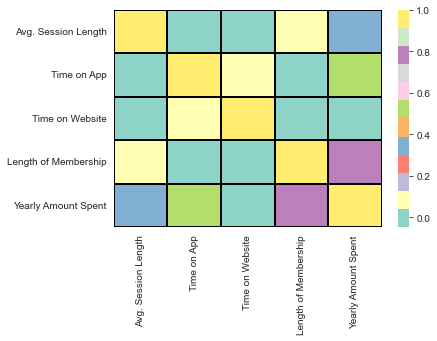

In [70]:
sns.heatmap(data.corr(), cmap='Set3', linewidth=0.01, linecolor='black')

What's your result ?!


Now, with the help of the information that the trained model gave us on our data, think in which part should this company invest more?

As a Data Scientist i can present two analysis : 


1 . we can invest only on Application, Why? Because for each unit of time, we keep the customer more time in the application, about 39$ bank account.

2 . On another hand, i say most of businesses have a website, so it's awful that our website is very terrible, so we should invest on our website.

for example in Iran SnappFood(Online food) invest on its App and DigiKala(like Amazon) invest on its Web :)

Honestly it's very hard to choose... :)

In the table above we can see that " Lnegth of Membership " is most efficient.

So now i want to check which one is more efficient on " Length of Membership " App OR Web ?!

In [27]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [28]:
# Choosing features and label

x = data.drop(['Email','Address','Avatar','Length of Membership'], axis=1)
y = data['Length of Membership']

In [29]:
# Dividing data to train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
# Linear Regression with scikit learn

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
# fit the model on training data

lr.fit(x_train, y_train)

LinearRegression()

In [35]:
# model's prediction

pred2 = lr.predict(x_test)

In [36]:
# Computing error

my_error = abs(pred2.mean() - data['Length of Membership'].mean()) * 100 / data['Length of Membership'].mean()
my_error

# I think it's a good error

3.354196979849595

In [37]:
lr.coef_

array([-0.40639335, -0.60988478, -0.00815399,  0.01583187])

In [38]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Yearly Amount Spent'],
      dtype='object')

In [39]:
coef = pd.DataFrame(lr.coef_, x.columns)
coef.columns = ['Coeffecient']
coef

,Coeffecient
Avg. Session Length,-0.406393
Time on App,-0.609885
Time on Website,-0.008154
Yearly Amount Spent,0.015832


In the table we see " Time on App " is more efficient than " Time on Website " on " Length of Membership " ...

so my final answer is to invest on the App, because it has a very good effect (more than web) " Length of Membership " and " Yearly Amount Spent " .

# The End :)